In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from skimage import morphology as mo
from skimage.morphology import skeletonize

In [2]:
# Imagenes originales
image1 = cv.imread('assets/butterfly.jpeg')
image2 = cv.imread('assets/chestxray.jpeg')
image3 = cv.imread('assets/quetzalgris.png')

In [3]:
gImage1 = cv.cvtColor(image1, cv.COLOR_BGR2GRAY)
gImage2 = cv.cvtColor(image2, cv.COLOR_BGR2GRAY)
gImage3 = cv.cvtColor(image3, cv.COLOR_BGR2GRAY)

In [4]:
def plot3x1(img1, img2, img3, title1, title2, title3):
    plt.figure(figsize=(15, 15))
    plt.subplot(3, 3, 1)
    plt.imshow(cv.cvtColor(img1, cv.COLOR_BGR2RGB))
    plt.title(title1)
    plt.subplot(3, 3, 2)
    plt.imshow(cv.cvtColor(img2, cv.COLOR_BGR2RGB))
    plt.title(title2)
    plt.subplot(3, 3, 3)
    plt.imshow(cv.cvtColor(img3, cv.COLOR_BGR2RGB))
    plt.title(title3)

In [5]:
# Imagenes binarizadas
_, bImage1 = cv.threshold(gImage1, 127, 255, cv.THRESH_BINARY)
_, bImage2 = cv.threshold(gImage2, 127, 255, cv.THRESH_BINARY)
_, bImage3 = cv.threshold(gImage3, 127, 255, cv.THRESH_BINARY)

In [6]:
# Operacion Morfologica: Dilatacion
kernel = np.ones((5,5), np.uint8)
dImage1 = cv.dilate(bImage1, kernel, iterations=1)
dImage2 = cv.dilate(bImage2, kernel, iterations=1)
dImage3 = cv.dilate(bImage3, kernel, iterations=1)

In [7]:
# Operacion Morfologica: Erosion
eImage1 = cv.erode(bImage1, kernel, iterations=1)
eImage2 = cv.erode(bImage2, kernel, iterations=1)
eImage3 = cv.erode(bImage3, kernel, iterations=1)

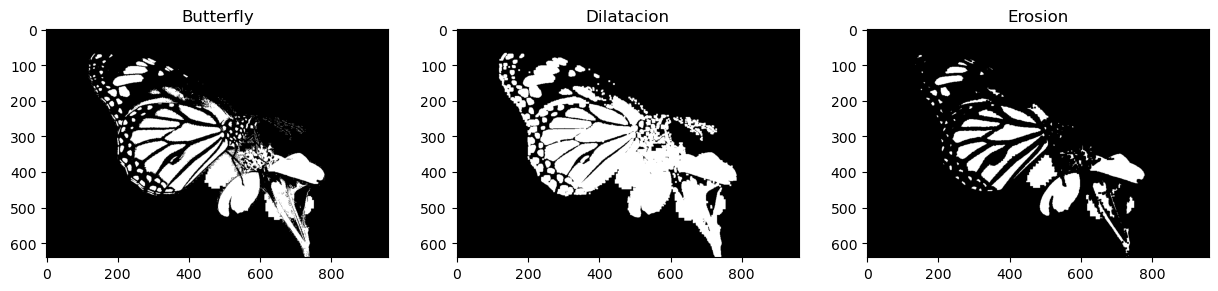

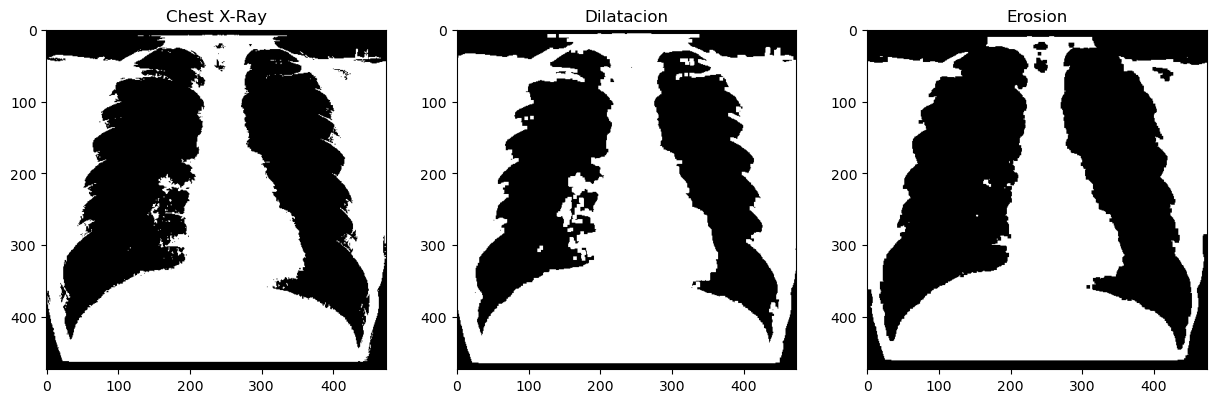

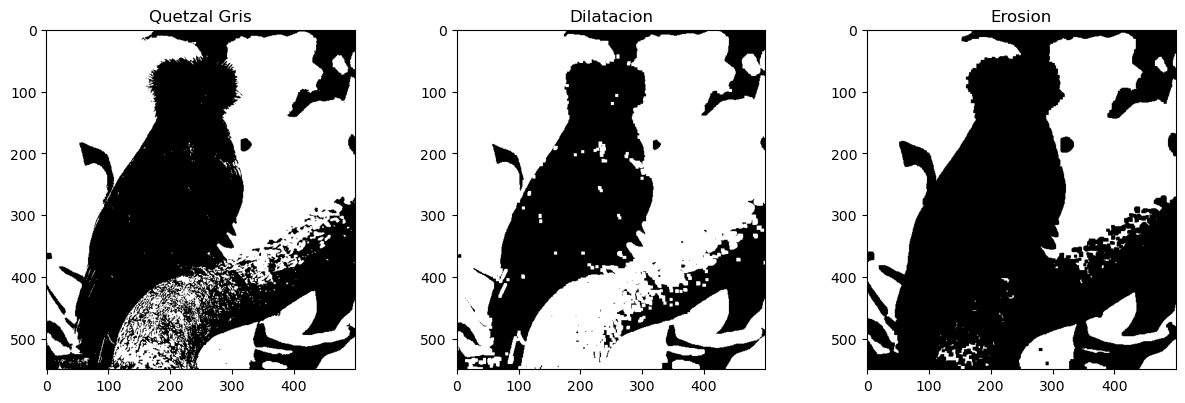

In [8]:
# Show images
plot3x1(bImage1, dImage1, eImage1, 'Butterfly', 'Dilatacion', 'Erosion')
plot3x1(bImage2, dImage2, eImage2, 'Chest X-Ray','Dilatacion', 'Erosion')
plot3x1(bImage3, dImage3, eImage3, 'Quetzal Gris','Dilatacion', 'Erosion')

In [9]:
opImage1 = cv.morphologyEx(bImage1, cv.MORPH_OPEN, kernel)
opImage2 = cv.morphologyEx(bImage2, cv.MORPH_OPEN, kernel)
opImage3 = cv.morphologyEx(bImage3, cv.MORPH_OPEN, kernel)

In [10]:
clImage1 = cv.morphologyEx(bImage1, cv.MORPH_CLOSE, kernel)
clImage2 = cv.morphologyEx(bImage2, cv.MORPH_CLOSE, kernel)
clImage3 = cv.morphologyEx(bImage3, cv.MORPH_CLOSE, kernel)

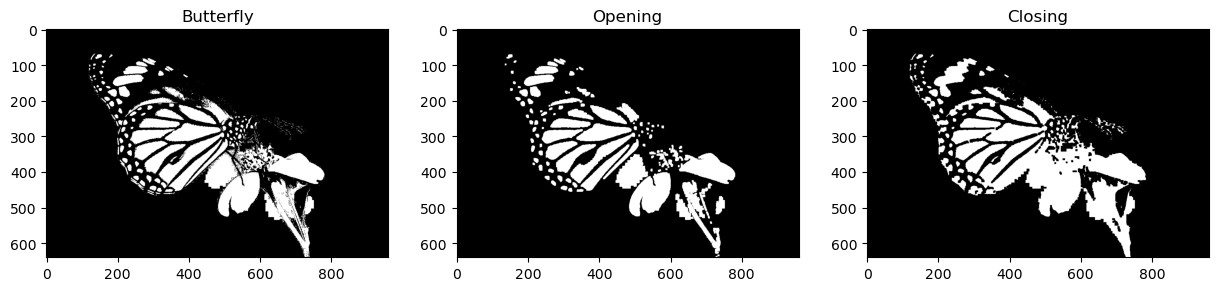

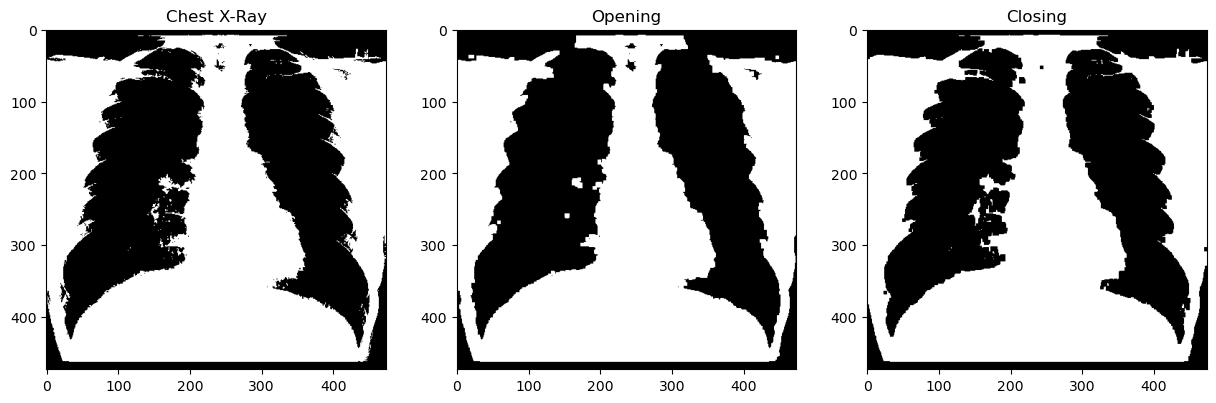

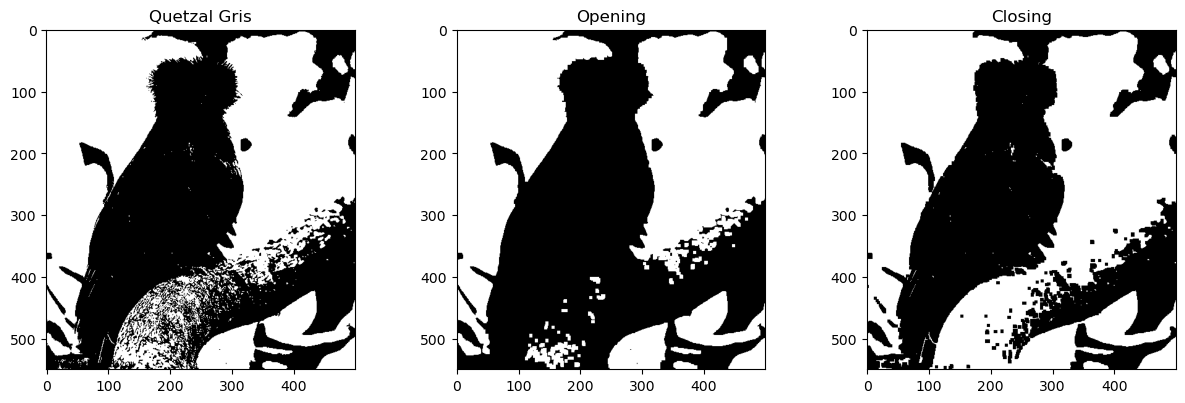

In [11]:
# Show images
plot3x1(bImage1, opImage1, clImage1, 'Butterfly', 'Opening', 'Closing')
plot3x1(bImage2, opImage2, clImage2, 'Chest X-Ray','Opening', 'Closing')
plot3x1(bImage3, opImage3, clImage3, 'Quetzal Gris','Opening', 'Closing')

In [12]:
# White Top Hat
kernel = np.ones((15,15), np.uint8)
wthImage1 = cv.morphologyEx(gImage1, cv.MORPH_TOPHAT, kernel)
wthImage2 = cv.morphologyEx(gImage2, cv.MORPH_TOPHAT, kernel)
wthImage3 = cv.morphologyEx(gImage3, cv.MORPH_TOPHAT, kernel)

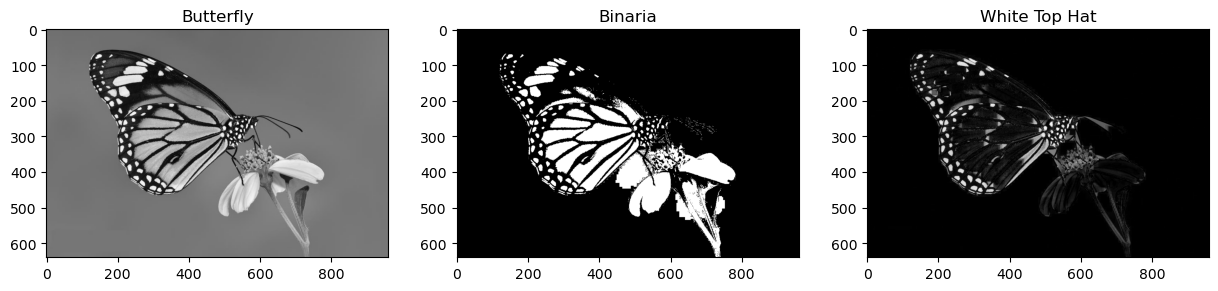

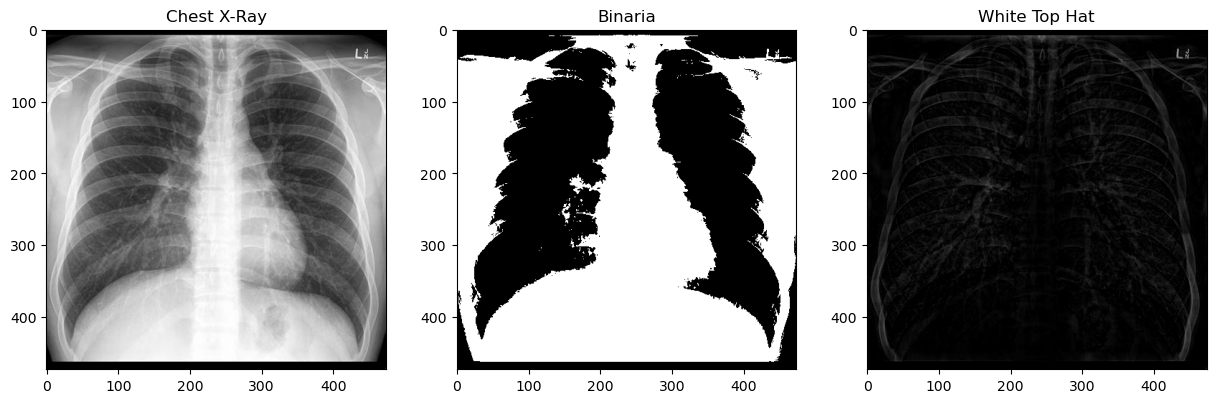

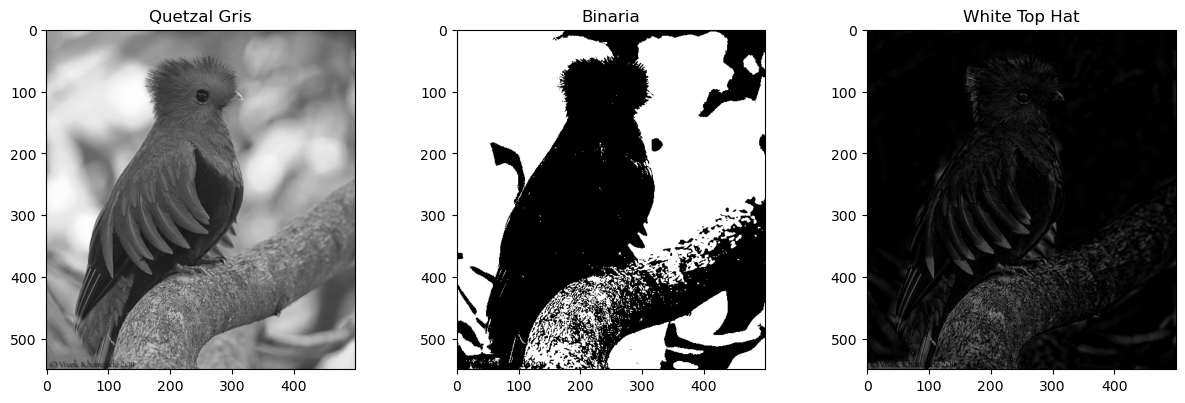

In [13]:
# Show images
plot3x1(gImage1, bImage1, wthImage1, 'Butterfly', 'Binaria', 'White Top Hat')
plot3x1(gImage2, bImage2, wthImage2, 'Chest X-Ray','Binaria', 'White Top Hat')
plot3x1(gImage3, bImage3, wthImage3, 'Quetzal Gris','Binaria', 'White Top Hat')